## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    tag = f'BN-{batch}'
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[tag] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______

50000/50000 [==============================] - 48s 966us/step - loss: 0.5809 - acc: 0.7950 - val_loss: 1.5887 - val_acc: 0.5385
Epoch 26/50
50000/50000 [==============================] - 49s 971us/step - loss: 0.5656 - acc: 0.7995 - val_loss: 1.5889 - val_acc: 0.5444
Epoch 27/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.5476 - acc: 0.8069 - val_loss: 1.6324 - val_acc: 0.5349
Epoch 28/50
50000/50000 [==============================] - 50s 999us/step - loss: 0.5322 - acc: 0.8103 - val_loss: 1.6139 - val_acc: 0.5451
Epoch 29/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.5171 - acc: 0.8166 - val_loss: 1.6379 - val_acc: 0.5448
Epoch 30/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.5144 - acc: 0.8183 - val_loss: 1.6546 - val_acc: 0.5384
Epoch 31/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4807 - acc: 0.8292 - val_loss: 1.6909 - val_acc: 0.5431
Epoch 32/50
50000/50000 [===============

50000/50000 [==============================] - 21s 425us/step - loss: 0.2996 - acc: 0.9022 - val_loss: 1.9430 - val_acc: 0.5088
Epoch 23/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.2737 - acc: 0.9124 - val_loss: 1.9797 - val_acc: 0.5032
Epoch 24/50
50000/50000 [==============================] - 21s 428us/step - loss: 0.2590 - acc: 0.9161 - val_loss: 2.0275 - val_acc: 0.5111
Epoch 25/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.2444 - acc: 0.9204 - val_loss: 2.0543 - val_acc: 0.5085
Epoch 26/50
50000/50000 [==============================] - 23s 452us/step - loss: 0.2224 - acc: 0.9284 - val_loss: 2.0907 - val_acc: 0.5125
Epoch 27/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.2119 - acc: 0.9307 - val_loss: 2.1067 - val_acc: 0.5125
Epoch 28/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.1895 - acc: 0.9398 - val_loss: 2.1549 - val_acc: 0.5162
Epoch 29/50
50000/50000 [=======

50000/50000 [==============================] - 14s 290us/step - loss: 0.4274 - acc: 0.8677 - val_loss: 1.7216 - val_acc: 0.4973
Epoch 20/50
50000/50000 [==============================] - 14s 289us/step - loss: 0.3875 - acc: 0.8841 - val_loss: 1.7681 - val_acc: 0.5038
Epoch 21/50
50000/50000 [==============================] - 14s 290us/step - loss: 0.3506 - acc: 0.8978 - val_loss: 1.7940 - val_acc: 0.5038
Epoch 22/50
50000/50000 [==============================] - 14s 289us/step - loss: 0.3169 - acc: 0.9089 - val_loss: 1.8471 - val_acc: 0.5002
Epoch 23/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.2855 - acc: 0.9200 - val_loss: 1.8927 - val_acc: 0.5020
Epoch 24/50
50000/50000 [==============================] - 15s 292us/step - loss: 0.2615 - acc: 0.9281 - val_loss: 1.9404 - val_acc: 0.5019
Epoch 25/50
50000/50000 [==============================] - 15s 293us/step - loss: 0.2307 - acc: 0.9400 - val_loss: 1.9862 - val_acc: 0.5013
Epoch 26/50
50000/50000 [=======

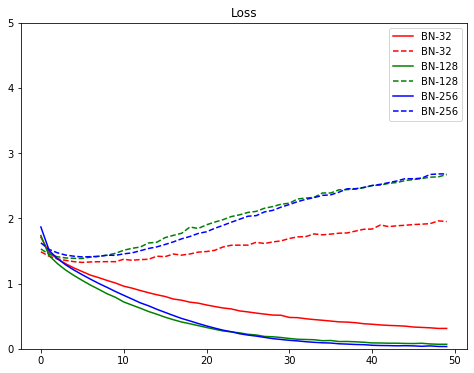

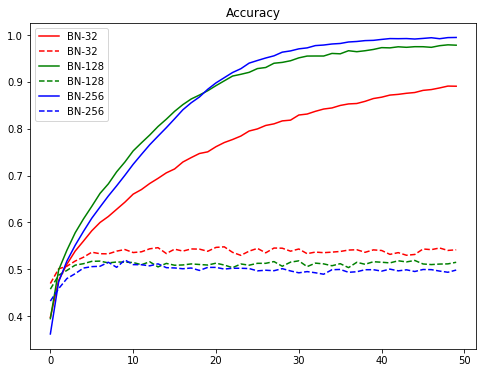

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()